## Задание  

Таблица (task2.txt) содержит 11 столбцов чисел. Первые 10 столбцов - входные переменные (x_1 , …. , x_10), 11-й столбец - выходная прогнозируемая переменная y. Каждая строка в файле - это один обучающий пример для построения статистической модели для зависимости y = y(x_1,x_2,..,x_10). Конкретный вид связи между выходной и входными переменными не известен.

Требуется провести разведочный анализ данных, выбрать критерий для точности модели, и указать степень важности (информативности) каждой из 10 входных переменных с точки зрения точности модели. Что еще можно предложить чтобы улучшить получившийся результат?

Файл: task2.txt

# Решение

### Разведочный анализ данных
Загрузим датасет и посмотрим на его характеристики с помощью pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
df = pd.read_csv('task2.txt', sep='\t', header=None)
    
df.info()
df.describe()

In /home/andrey/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/andrey/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/andrey/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


/home/andrey/miniconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.490491     0.499785     0.496466     0.503167     0.508902   
std       0.293920     0.278833     0.298024     0.284102     0.283300   
min       0.000188     0.000085     0.003110     0.001223     0.005314   
25%       0.218825     0.262168     0.231492     0.268925     0.274572   
50%       0.504439     0.500901     0.484347     0.503412     0.508629   
75%       0.738004     0.734516     0.764729     0.747587     0.742461   
max       0.999566     0.999959     0.998918     0.998785     0.998478   

                5            6            7            8            9   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.513466     0.487111     0.498870     0.505611     0.499113   
std       0.291059     0.288407     0.285954     0.283131     0.284073   
min       0.000517     0.000493     0.000408     0.007883     0.000170   
25%       0.255524     0.237778     0.256103     0.262332     0.249675   
50%       0.527155     0.475274     0.501300     0.518847     0.509422   
75%       0.766870     0.738885     0.736849     0.748473     0.741870   
max       0.999059     0.999179     0.998646     0.998884     0.998819   

                10  
count  1000.000000  
mean     15.014000  
std       4.771223  
min       3.000000  
25%      12.000000  
50%      15.000000  
75%      18.000000  
max      29.000000

Как мы видим, всего в датасете 1000 событий, 10 фичей и одна целевая переменная. 
Пропущенных значений нет.
Все входные параметры являются числами с плавающей точкой и нормированы на промежутке от 0 до 1. 
Выходное значение имеет целочисленный тип и варьирует в диапазоне от [3, 29]. 

Построим диаграммы рассеяния между парами параметров с помощью метода pairplot()

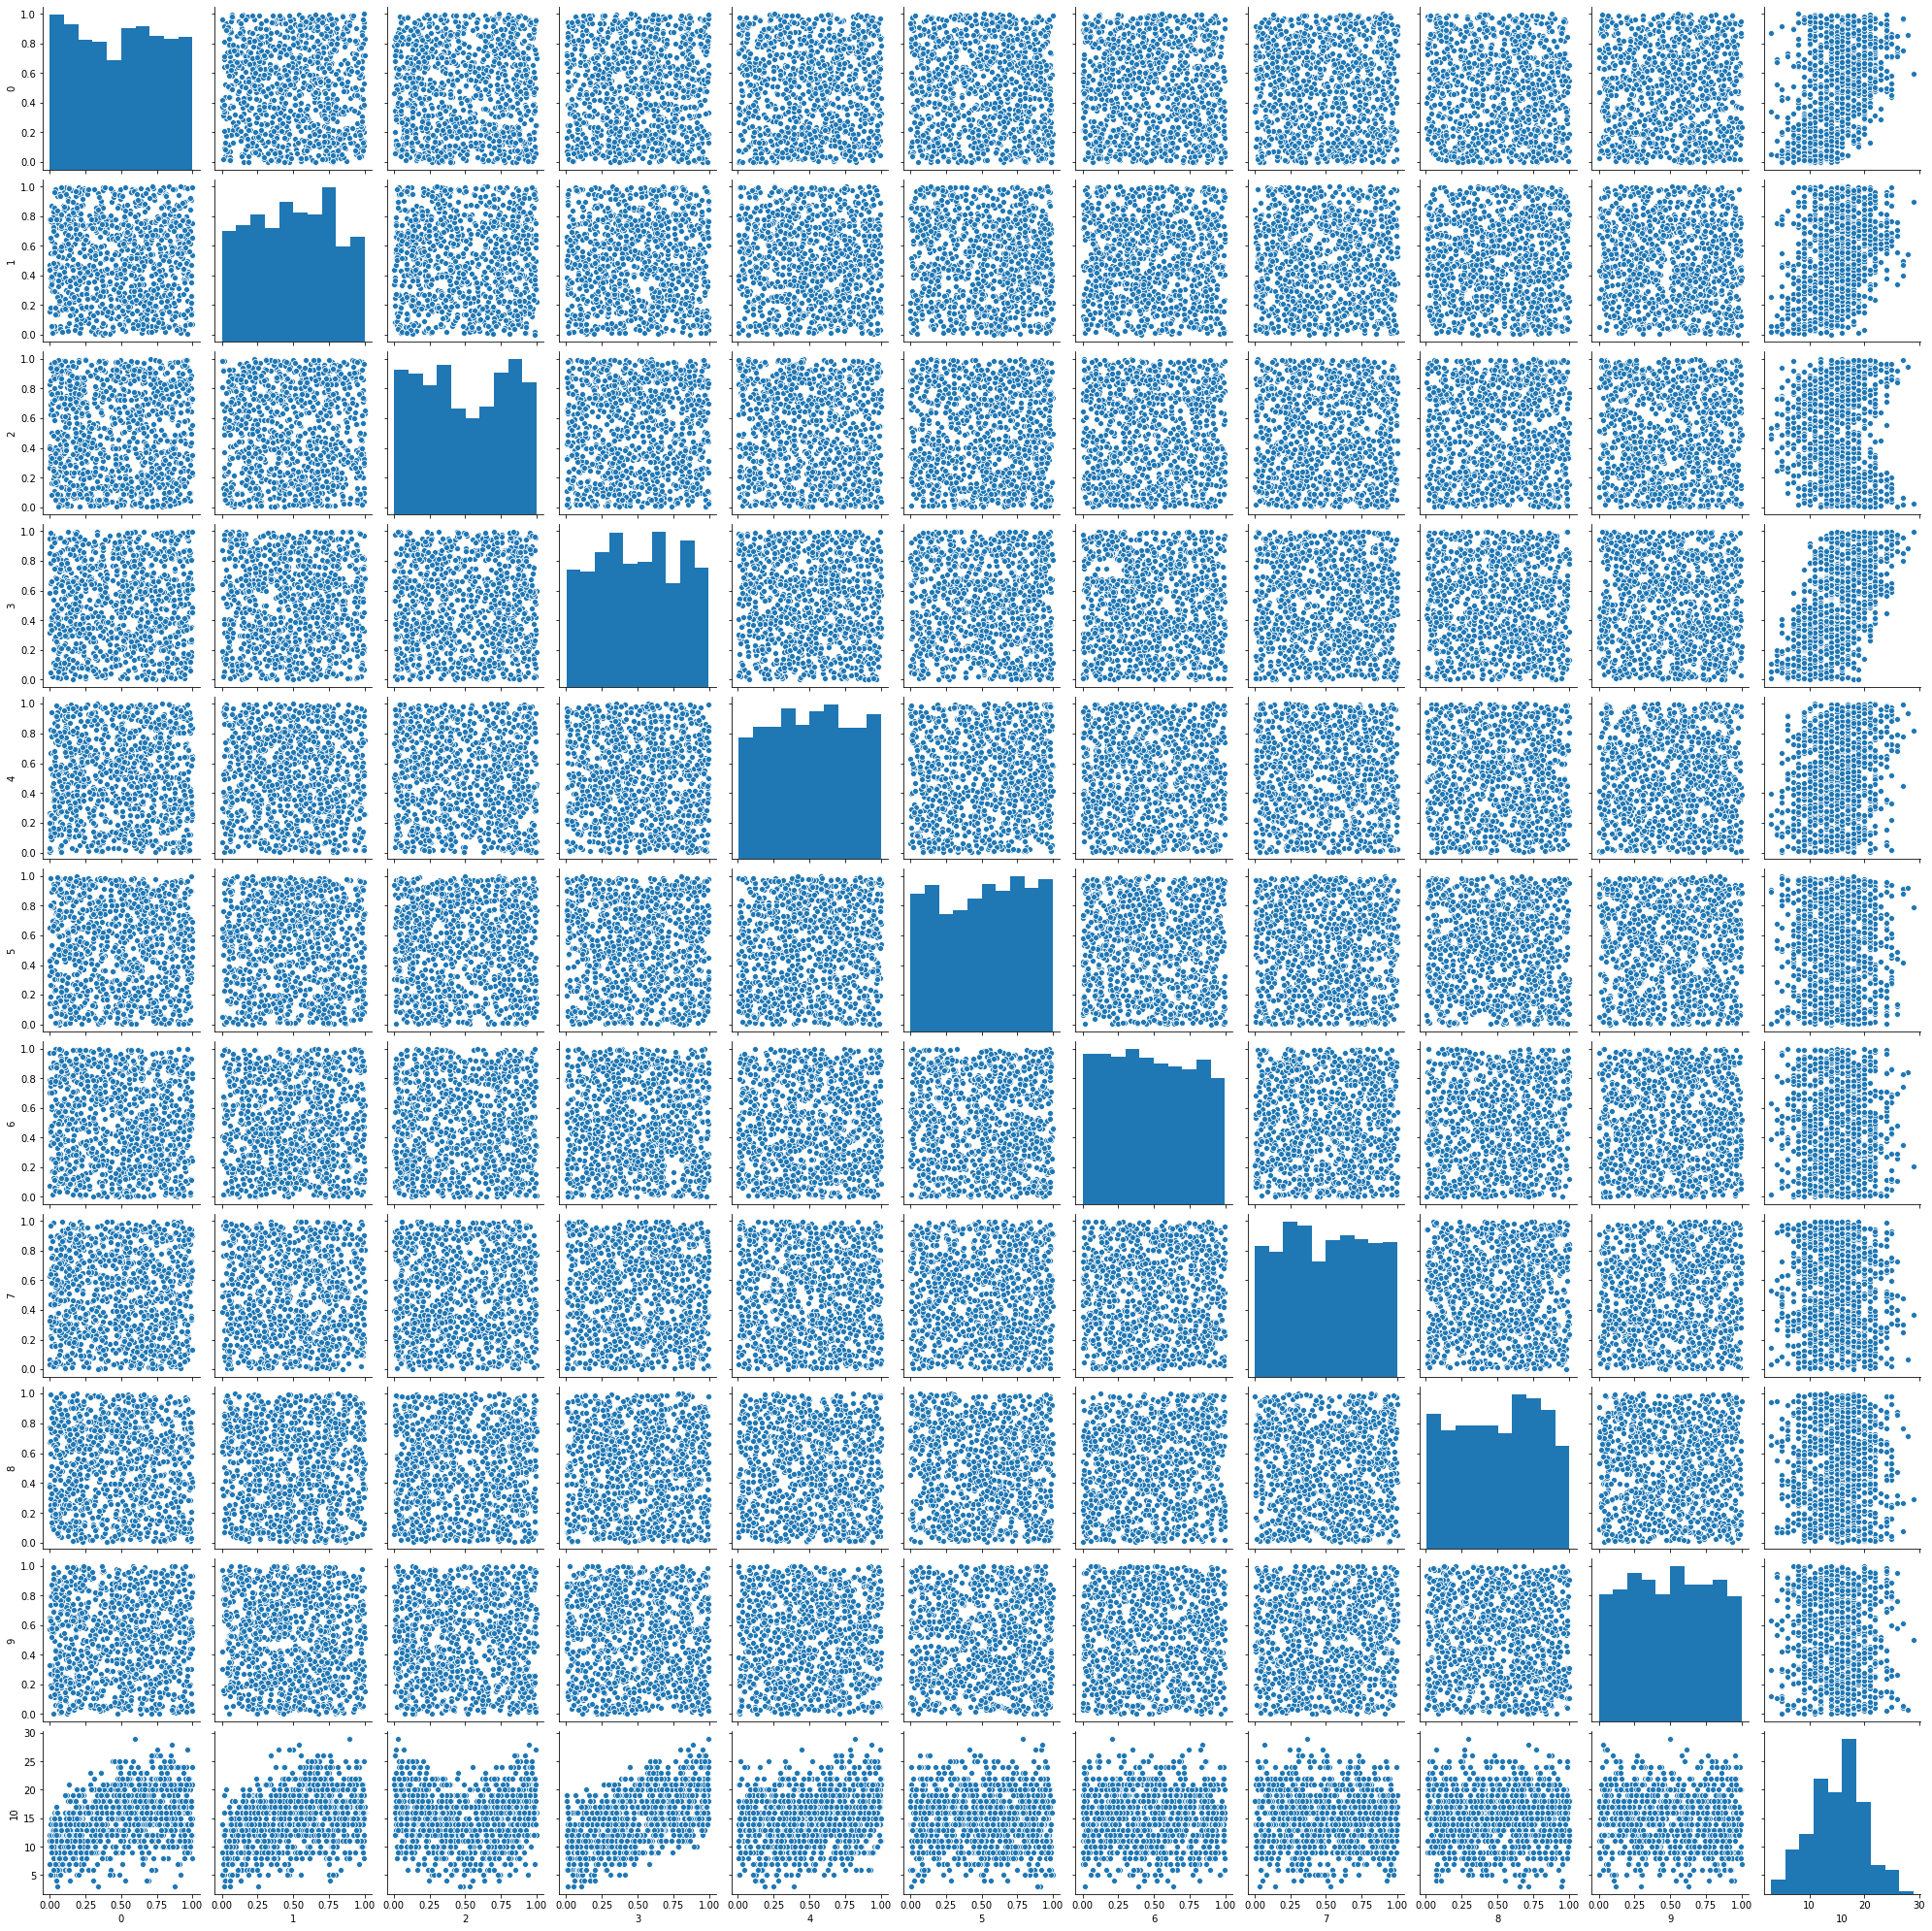

In [2]:
sns.pairplot(df)

Построим тепловую карту для матрицы корелляций

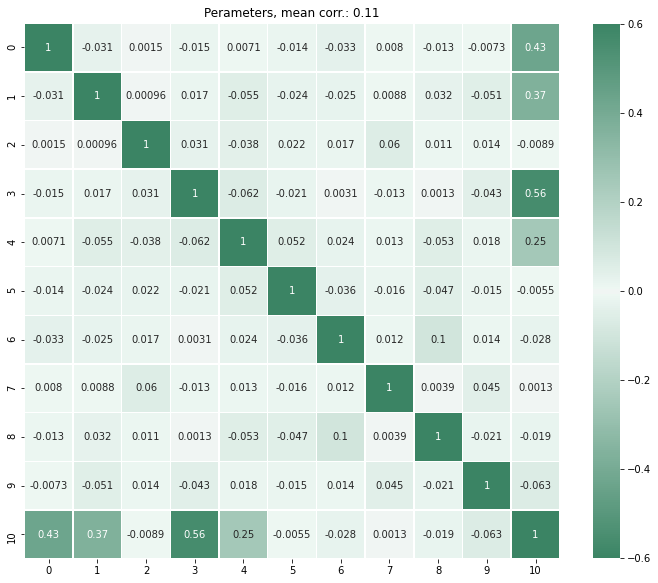

In [3]:
def corr_table(data, plt_name=''):
    plt.figure(figsize=(12,12))
    pearsoncorr = data.corr()
    g = sns.heatmap(
                pearsoncorr, 
                vmin=-0.6,
                vmax=0.6,
                square=True,
                cmap=sns.diverging_palette(150, 150, sep=1, as_cmap=True),
                annot=True,
                linewidth=0.5,
                cbar_kws={"shrink": .82})
    g.set_title(f"{plt_name}, mean corr.: {round(pearsoncorr.mean().mean(), 2)}")
    plt.show()    

    
corr_table(df, plt_name='Perameters')

Мы видим, что входные переменные распределены более менее равномерно, при этом распределение выходной переменной может быть приближено нормальным распределением.

Судя по таблице и графику, входные переменные не кореллируют друг с другом. При этом заметна зависимость между первыми 5-ю переменными и целевой переменной. У переменной с индексом 4 есть линейная зависимость, у переменной 2 - нелинейная зависимость, а у переменных 0, 1, 3 есть как линейная так и нелинейная состовляющие зависимости.

Так как в данных есть нелинейные зависимости, то нужно использовать модели, которые могут описывать такие зависимости, либо генерировать новые признаки, на основе которых можно будет построить линейную модель. 
Соответственно будем пользоваться случайным лесом и градиентным бустингом, а также полиномиальной линейной регрессией, для чего будем генерировать новые признаки.

## Выбор критерия для точности модели

Создадим отложенную тестовую выборку для проверки финальной модели размером в 25% датасета.

In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1000, 10) (1000,)
(750, 10) (750,)
(250, 10) (250,)


### Выбор метрики точности

В качестве метрики точности модели будем использовать коэффициент детерминации R^2.
Для выбора модели и гиперпараметров воспользуемся кросс-валидацией на тренировочной выборке.

Прогоним кросс-валидацию основных моделей, таким образом получим первый baseline.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import warnings

from lightgbm import LGBMRegressor


def cross_val(model, X_train, y_train):
    print('--- Model', type(model).__name__)
    scores = cross_val_score(model, X_train, y_train, cv=5, n_jobs=1, verbose=0)
    #print(scores)  # Return the coefficient of determination R^2 of the prediction.
    print("R2 score: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
    print()


for reg in [LinearRegression(), Ridge(), Lasso(), RandomForestRegressor(), 
            LGBMRegressor()]:
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        cross_val(reg, X_train, y_train)

--- Model LinearRegression
R2 score: 0.7509 (+/- 0.0186)

--- Model Ridge
R2 score: 0.7509 (+/- 0.0200)

--- Model Lasso
R2 score: -0.0121 (+/- 0.0183)

--- Model RandomForestRegressor
R2 score: 0.8520 (+/- 0.0169)

--- Model LGBMRegressor
R2 score: 0.9410 (+/- 0.0083)



Лучше всех показывает себя модель градиентного бустинга, а линейная регрессией с регуляризацией Лассо предсказывает значения хуже всех. Логично, что линейные модели с таким набором признаков работают хуже леса и бустинга, которые могут описать нелинейные зависимости. 

Попробуем обучить модели только по первым 5 признакам.

In [6]:
X_train_5 = X_train.iloc[:,:5]
X_test_5 = X_test.iloc[:,:5]

for reg in [LinearRegression(), Ridge(), Lasso(), RandomForestRegressor(), 
            LGBMRegressor()]:
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        cross_val(reg, X_train_5, y_train)

--- Model LinearRegression
R2 score: 0.7524 (+/- 0.0182)

--- Model Ridge
R2 score: 0.7522 (+/- 0.0200)

--- Model Lasso
R2 score: -0.0121 (+/- 0.0183)

--- Model RandomForestRegressor
R2 score: 0.8798 (+/- 0.0230)

--- Model LGBMRegressor
R2 score: 0.9497 (+/- 0.0080)



Точность всех моделей слегка улучшилась, значит последние 5 признаков только мешают модели обучаться 
и их можно исключить.

Чтобы улучшить точность линейных моделей можно сгенерировать новые признаки, например полиномиальные.

In [7]:
#добавим полиномиальные фичи 2 степени
from sklearn.preprocessing import PolynomialFeatures

def try_poly_cv(degree=2):
    poly = PolynomialFeatures(degree)
    X_train_5_poly = poly.fit_transform(X_train_5)
    X_test_5_poly = poly.fit_transform(X_test_5)

    for reg in [LinearRegression(), Ridge(), Lasso(), RandomForestRegressor(), 
                LGBMRegressor()]:

        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            cross_val(reg, X_train_5_poly, y_train)

try_poly_cv(degree=2)

--- Model LinearRegression
R2 score: 0.9228 (+/- 0.0206)

--- Model Ridge
R2 score: 0.8913 (+/- 0.0208)

--- Model Lasso
R2 score: -0.0121 (+/- 0.0183)

--- Model RandomForestRegressor
R2 score: 0.9058 (+/- 0.0252)

--- Model LGBMRegressor
R2 score: 0.9643 (+/- 0.0062)



Видно, что у всех моделей улучшилась метрика, при этом для линейных моделей это наиболее заметно. 
Попробуем добавить признаки 3 степени

In [8]:
#добавим полиномиальные фичи 3 степени
try_poly_cv(degree=3)

--- Model LinearRegression
R2 score: 0.9914 (+/- 0.0018)

--- Model Ridge
R2 score: 0.9262 (+/- 0.0161)

--- Model Lasso
R2 score: -0.0121 (+/- 0.0183)

--- Model RandomForestRegressor
R2 score: 0.9116 (+/- 0.0241)

--- Model LGBMRegressor
R2 score: 0.9606 (+/- 0.0154)



In [9]:
#добавим полиномиальные фичи 4 степени
try_poly_cv(degree=4)

--- Model LinearRegression
R2 score: 0.9945 (+/- 0.0025)

--- Model Ridge
R2 score: 0.9495 (+/- 0.0087)

--- Model Lasso
R2 score: -0.0121 (+/- 0.0183)

--- Model RandomForestRegressor
R2 score: 0.9107 (+/- 0.0302)

--- Model LGBMRegressor
R2 score: 0.9560 (+/- 0.0175)



In [10]:
#добавим полиномиальные фичи 5 степени
try_poly_cv(degree=5)

--- Model LinearRegression
R2 score: 0.9893 (+/- 0.0049)

--- Model Ridge
R2 score: 0.9660 (+/- 0.0037)

--- Model Lasso
R2 score: -0.0121 (+/- 0.0183)

--- Model RandomForestRegressor
R2 score: 0.9098 (+/- 0.0214)

--- Model LGBMRegressor
R2 score: 0.9550 (+/- 0.0174)



Лучше всего себя показывает линейная регрессия с добавлением полиномиальных признаков 4 степени.
Посмотрим, не переобучились ли мы

In [11]:
poly_4 = PolynomialFeatures(4)
X_train_5_poly_4 = poly_4.fit_transform(X_train_5)
X_test_5_poly_4 = poly_4.fit_transform(X_test_5)

model = LinearRegression()
model.fit(X_train_5_poly_4, y_train)
score = model.score(X_test_5_poly_4, y_test)
print('Linear regression with 4-degree polinomial features:\n', score)

Linear regression with 4-degree polinomial features:
 0.9947296494707031


Как мы видим, метрика R2 очень высока. Вряд ли в реальных данных удастся достигнуть такой точности. 
Вероятнее всего, что мы работаем с синтетическими данными.

У всех представленных моделей есть общий недостаток, они предсказывают целевую переменную в виде числа с плавающей точкой, а в нашей задаче нужно предсказывать целочисленные значения. Для решения этой проблемы будем приводить прогнозы моделей к целочисленному формату, например, с помощью округления. 

Так как у нас задача регрессии с дискретной выходной переменной, также добавим метрику Accuracy, которая обычно используется в задачах многоклассовой классификации.

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score


y_pred_5_poly_4 = model.predict(X_test_5_poly_4)
accuracy = accuracy_score(np.round(y_pred_5_poly_4), y_test)
print('Accuracy:', accuracy)

Accuracy: 0.856


Это довольно хорошая точность. Посмотрим на значимость признаков.

In [13]:
print('Всего получилось признаков:', X_test_5_poly_4.shape[1])

Всего получилось признаков: 126


Посмотрим на значимость каждого из полученных признаков двумя способами: permutation importance и Chap values

In [14]:
from sklearn.inspection import permutation_importance



r = permutation_importance(model, X_test_5_poly_4, y_test, n_repeats=30, random_state=0)

for i in r.importances_mean.argsort()[::-1]:     
    if r.importances_mean[i] - 2 * r.importances_std[i] >= 0:
        print(f"{i:<6}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

61    7.530 +/- 0.531
7     2.453 +/- 0.176
3     2.266 +/- 0.138
26    2.098 +/- 0.135
36    1.913 +/- 0.144
15    1.620 +/- 0.093
20    1.305 +/- 0.074
22    1.188 +/- 0.094
4     1.173 +/- 0.064
55    1.028 +/- 0.060
18    0.662 +/- 0.037
11    0.579 +/- 0.045
48    0.458 +/- 0.027
91    0.417 +/- 0.031
52    0.413 +/- 0.025
47    0.268 +/- 0.014
35    0.249 +/- 0.013
6     0.235 +/- 0.020
57    0.207 +/- 0.017
90    0.195 +/- 0.010
71    0.190 +/- 0.011
21    0.146 +/- 0.012
40    0.139 +/- 0.009
38    0.132 +/- 0.009
17    0.129 +/- 0.008
53    0.128 +/- 0.008
12    0.119 +/- 0.006
16    0.102 +/- 0.006
13    0.084 +/- 0.004
49    0.083 +/- 0.005
113   0.083 +/- 0.005
112   0.081 +/- 0.005
46    0.069 +/- 0.004
43    0.066 +/- 0.004
98    0.064 +/- 0.003
10    0.059 +/- 0.003
117   0.058 +/- 0.004
1     0.054 +/- 0.004
23    0.052 +/- 0.003
50    0.049 +/- 0.003
34    0.047 +/- 0.003
32    0.038 +/- 0.003
125   0.037 +/- 0.002
122   0.036 +/- 0.002
37    0.036 +/- 0.002
25    0.03

Using 250 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


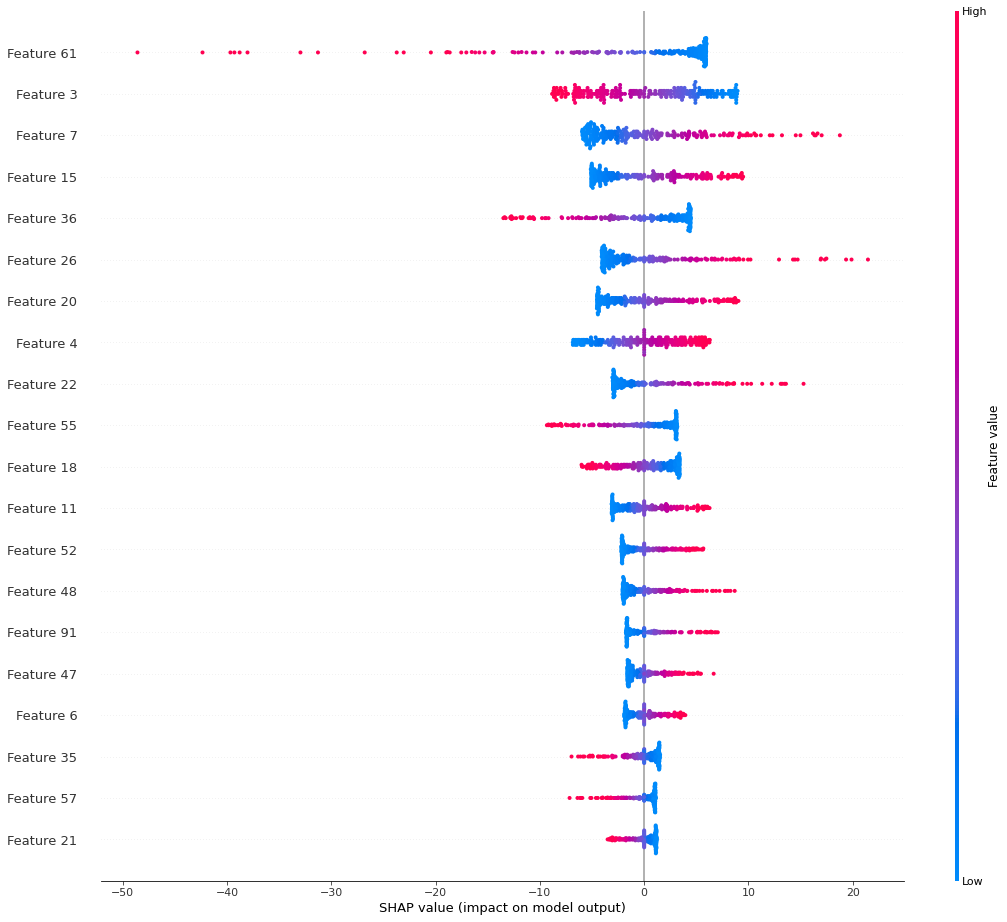

In [15]:
import shap  # package used to calculate Shap values

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    # Create object that can calculate shap values
    explainer = shap.KernelExplainer(model.predict, X_test_5_poly_4)

    # calculate shap values. This is what we will plot.
    # Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
    shap_values = explainer.shap_values(X_test_5_poly_4)

    # Make plot. Index of [1] is explained in text below.
    shap.summary_plot(shap_values, X_test_5_poly_4, plot_size=(18,16))

## Градиентный бустинг

Посмотрим какие результаты смогут дать дать нам другие модели, например, градиентный бустинг.

Для этого реализуем свою модель на основе базовых классов BaseEstimator и RegressorMixin, которая на в результате метода predict будет давать нам целочисленные значения.

In [16]:
from sklearn.base import BaseEstimator, RegressorMixin


class RegressionModel(BaseEstimator, RegressorMixin):
    def __init__(self, model=LinearRegression(), **kwargs):
        """ Model that predicts only integer values
        
        model: any initialized model that has fit and predict methods
        params: dict with model parameters
        """
        self.model_ = model
        for parameter, value in kwargs.items():
            setattr(self.model_, parameter, value)
        self.__dict__.update(kwargs)
    
    def fit(self, X, y):
        self.model_.fit(X, y)
        return self
    
    def predict(self, X):
        return np.around(self.model_.predict(X))
    
    def get_params(self, deep=True):
        return self.__dict__

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self.model_, parameter, value)
        return self

    
# testing
reg = RegressionModel(model=Ridge(), alpha=1)
reg.fit([[4],[8],[12]], [2,4,6])
print(reg.predict([[1],[2],[3]]))
print(reg.score([[4],[8],[12]], [2,4,6]))

[1. 1. 2.]
1.0


Класс работает как надо, округляя значения предсказаний.

Теперь напишем функцию для работы с GridSearchCV, протестируем на регрессоре Тихонова (Ridge)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score


SCORING = {'R2': 'r2', 'Accuracy': 'accuracy'}


def grid_search(reg, params):
    """Grid search that makes search on multiple scorers and prints results
    
    reg: regressor model
    params: dict of possible model parameters, for example {'alpha': [0.1,0.3,.0.5]}
    
    return: estimator with best scores, gridsearch results
    """
    
    main_scorer = 'R2'
    gs = GridSearchCV(reg, param_grid=params, scoring=SCORING, refit=main_scorer, return_train_score=True)
    gs.fit(X_train_5_poly_4, y_train)
    results = gs.cv_results_

    print('Check some predictions', gs.predict(X_train_5_poly_4)[:10])
    print('Best params:', gs.best_params_)
    print('Best %s score: %s' % (main_scorer, gs.best_score_))
    print()
    for i, j, k in zip(results['mean_test_R2'], results['mean_test_Accuracy'], results['params']):
        print('R2: %s \tAcc: %s \tparams: %s' % (i,j,k))
    
    return gs.best_estimator_, results
    
    
reg = RegressionModel(Ridge())
params = {'alpha': np.linspace(0.0,1,11)}
    
ridge_best, results = grid_search(reg, params)

Check some predictions [ 7. 11.  8. 12. 18. 14. 17. 16. 14.  6.]
Best params: {'alpha': 0.0}
Best R2 score: 0.9934744005613119

R2: 0.9934744005613119 	Acc: 0.8640000000000001 	params: {'alpha': 0.0}
R2: 0.985412699043037 	Acc: 0.708 	params: {'alpha': 0.1}
R2: 0.9772059720966826 	Acc: 0.5946666666666667 	params: {'alpha': 0.2}
R2: 0.9704367130619735 	Acc: 0.5306666666666666 	params: {'alpha': 0.30000000000000004}
R2: 0.9644501508904332 	Acc: 0.48266666666666663 	params: {'alpha': 0.4}
R2: 0.9613165621081852 	Acc: 0.45999999999999996 	params: {'alpha': 0.5}
R2: 0.9573149448225081 	Acc: 0.43866666666666665 	params: {'alpha': 0.6000000000000001}
R2: 0.9530366477846315 	Acc: 0.41866666666666674 	params: {'alpha': 0.7000000000000001}
R2: 0.9489962388763612 	Acc: 0.4 	params: {'alpha': 0.8}
R2: 0.946874395794687 	Acc: 0.3933333333333333 	params: {'alpha': 0.9}
R2: 0.9437243892206599 	Acc: 0.38133333333333336 	params: {'alpha': 1.0}


Всё работает как положено. Как мы видим, оптимальные параметры соответствуют найденым ранее вручную.

Напишем функцию для визуализации скоров в зависимости от выбранного параметра.

In [18]:
def plot_cv_scores(results, scoring=None, param='param_alpha', xlim=(0, 1), ylim=(0, 1)):
    
    if not scoring:
        scoring = {'score'}
        
    plt.figure(figsize=(13, 13))
    plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
              fontsize=16)
    
    plt.xlabel(param)
    plt.ylabel("Score")

    ax = plt.gca()
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)

    # Get the regular numpy array from the MaskedArray
    X_axis = np.array(results[param].data, dtype=float)

    for scorer, color in zip(sorted(scoring), ['g', 'k']):
        for sample, style in (('train', '--'), ('test', '-')):
            sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
            sample_score_std = results['std_%s_%s' % (sample, scorer)]
            ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                            sample_score_mean + sample_score_std,
                            alpha=0.1 if sample == 'test' else 0, color=color)
            ax.plot(X_axis, sample_score_mean, style, color=color,
                    alpha=1 if sample == 'test' else 0.7,
                    label="%s (%s)" % (scorer, sample))

        best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
        best_score = results['mean_test_%s' % scorer][best_index]

        # Plot a dotted vertical line at the best score for that scorer marked by x
        ax.plot([X_axis[best_index], ] * 2, [0, best_score],
                linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

        # Annotate the best score for that scorer
        ax.annotate("%0.2f" % best_score,
                    (X_axis[best_index], best_score + 0.005))

    plt.legend(loc="best")
    plt.grid(False)
    plt.show()

In [19]:
def print_params(results):
    """ Show available parameters to plot """
    print('\n'.join([i for i in results.keys() if i[:6] == 'param_']))

print_params(results)

param_alpha


Визуализируем 

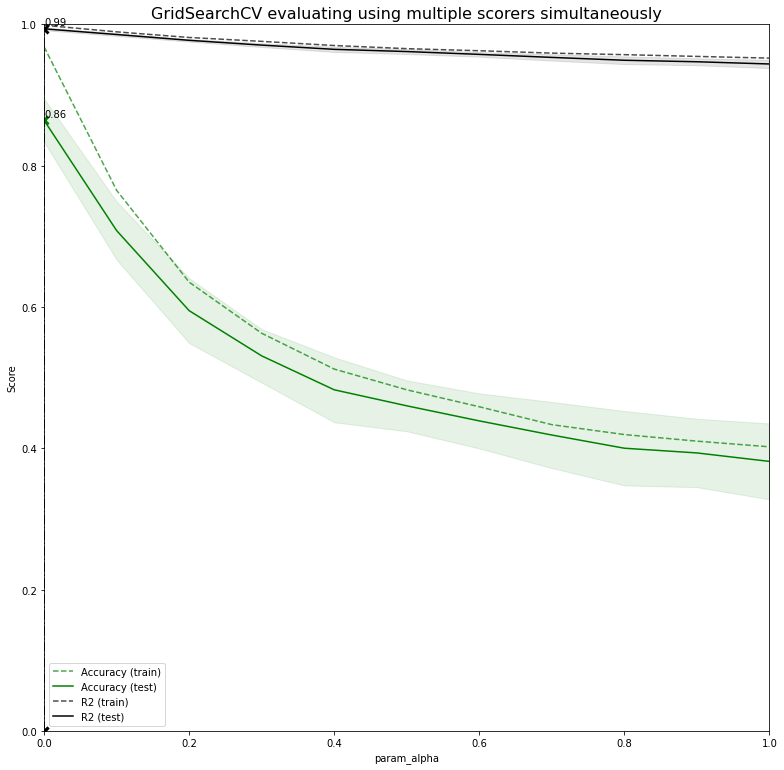

In [20]:
plot_cv_scores(results, scoring=SCORING, param='param_alpha')

Всё работает хорошо, с увеличением коэффициента L2 регуляризации в линейной регрессии точность предсказаний падает.

Повторим ту же процедуру для градиентного бустинга.

In [21]:
# takes few minutes to execute
reg = RegressionModel(LGBMRegressor())

params = {
    'max_depth': [30, 50, 80, 110],
    'n_estimators': [50, 100, 150, 200, 220],
}


with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
LGBMRegressor_best, results = grid_search(reg, params)
print_params(results)

Check some predictions [ 7. 11.  8. 12. 18. 14. 17. 16. 14.  6.]
Best params: {'max_depth': 30, 'n_estimators': 220}
Best R2 score: 0.9530691547104618

R2: 0.9460094707019915 	Acc: 0.4746666666666666 	params: {'max_depth': 30, 'n_estimators': 50}
R2: 0.9523807948814863 	Acc: 0.49733333333333335 	params: {'max_depth': 30, 'n_estimators': 100}
R2: 0.9522034656066403 	Acc: 0.484 	params: {'max_depth': 30, 'n_estimators': 150}
R2: 0.9527058003182983 	Acc: 0.48533333333333334 	params: {'max_depth': 30, 'n_estimators': 200}
R2: 0.9530691547104618 	Acc: 0.48266666666666663 	params: {'max_depth': 30, 'n_estimators': 220}
R2: 0.9460094707019915 	Acc: 0.4746666666666666 	params: {'max_depth': 50, 'n_estimators': 50}
R2: 0.9523807948814863 	Acc: 0.49733333333333335 	params: {'max_depth': 50, 'n_estimators': 100}
R2: 0.9522034656066403 	Acc: 0.484 	params: {'max_depth': 50, 'n_estimators': 150}
R2: 0.9527058003182983 	Acc: 0.48533333333333334 	params: {'max_depth': 50, 'n_estimators': 200}
R2: 0.9

Посмотрим на результаты

In [22]:
print('LGBMRegressor_best')
print('R2 score', LGBMRegressor_best.score(X_test_5_poly_4, y_test))

y_pred = LGBMRegressor_best.predict(X_test_5_poly_4)
boost_accuracy = np.sum([1 for i,j in zip(y_test, y_pred) if i == j])/len(y_test)

print('accuracy', boost_accuracy)

LGBMRegressor_best
R2 score 0.9544645535698529
accuracy 0.512


Как мы видим, нам не удалось достигнуть результатов, лучших чем у линейной регрессии.

Посмотрим на кривые обучения

In [23]:
print_params(results)

param_max_depth
param_n_estimators


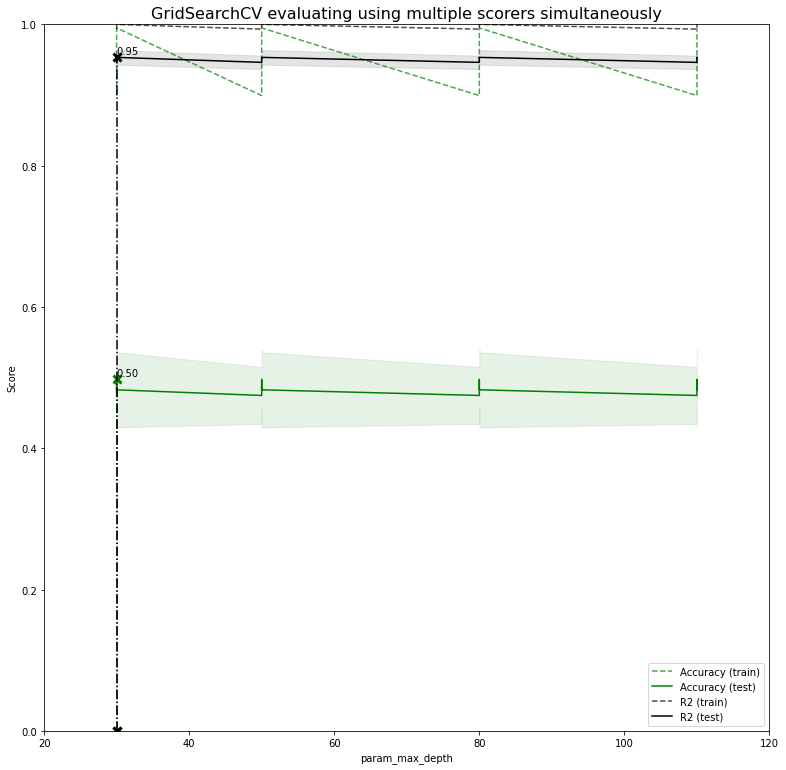

In [24]:
plot_cv_scores(results, scoring=SCORING, param='param_max_depth', xlim=(20,120))

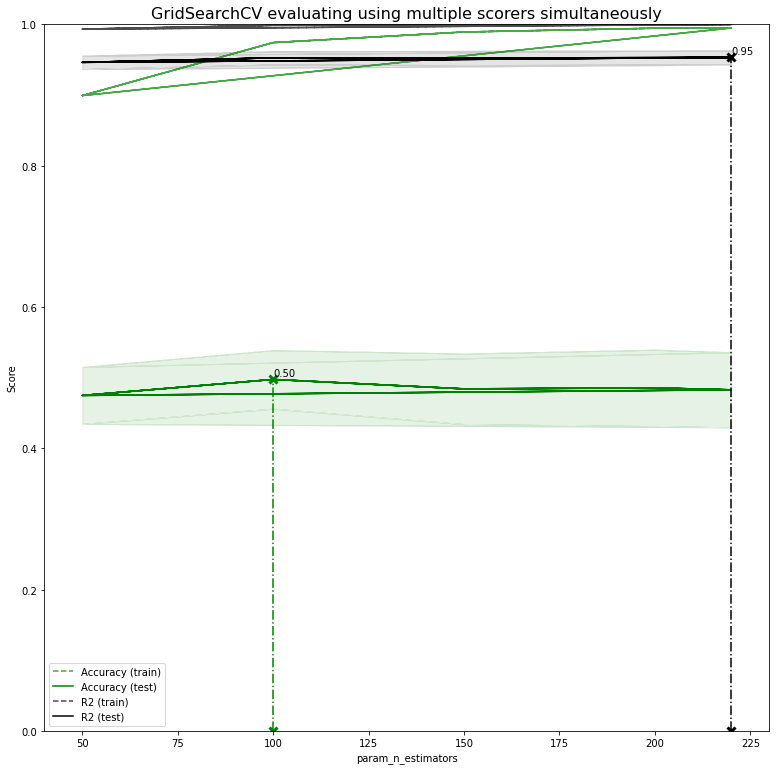

In [25]:
plot_cv_scores(results, scoring=SCORING, param='param_n_estimators', xlim=(40,230))

### Значимость признаков
Посмотрим на значимость признаков с помощью метода feature_importances_ LGBMRegressor модели. <br>
Значимость признаков в порядке убывания

In [26]:
important_features = [i for i in LGBMRegressor_best.model_.feature_importances_ if i > 0]
print('Number of important features', len(important_features))
print('Overall features', len(LGBMRegressor_best.model_.feature_importances_))
print()

for i in np.argsort(LGBMRegressor_best.model_.feature_importances_)[::-1]:
    print(f"feature index {i:<5} {LGBMRegressor_best.model_.feature_importances_[i]}")

Number of important features 100
Overall features 126

feature index 3     256
feature index 79    180
feature index 7     171
feature index 28    150
feature index 4     149
feature index 78    141
feature index 112   110
feature index 122   105
feature index 19    101
feature index 76    101
feature index 101   101
feature index 74    98
feature index 26    95
feature index 54    94
feature index 72    88
feature index 1     87
feature index 77    86
feature index 113   85
feature index 124   85
feature index 87    85
feature index 29    82
feature index 75    82
feature index 71    80
feature index 73    77
feature index 40    76
feature index 80    75
feature index 118   73
feature index 22    72
feature index 119   70
feature index 88    70
feature index 64    69
feature index 27    68
feature index 115   67
feature index 31    64
feature index 62    64
feature index 5     62
feature index 34    61
feature index 94    61
feature index 53    61
feature index 84    60
feature index 

Определим значимость признаков с помощью permutation importance, напечатаем признаки в порядке убывания 
значимости.

Этот тест поочерёдно перемешивает значения каждого признака и определяет, насколько при этом ухудшается качество предсказаний.

In [27]:
from sklearn.inspection import permutation_importance

r = permutation_importance(LGBMRegressor_best.model_, X_test_5_poly_4, y_test, n_repeats=30, random_state=0)

important_features = [i for i in r.importances_mean if round(i,3) > 0]
print('Number of important features', len(important_features))
print('Overall features', len(LGBMRegressor_best.model_.feature_importances_))
print()

for i in r.importances_mean.argsort()[::-1]:     
    if r.importances_mean[i] - 2 * r.importances_std[i] >= 0:
        print(f"{i:<12}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

Number of important features 45
Overall features 126

28          0.258 +/- 0.024
79          0.130 +/- 0.012
7           0.078 +/- 0.008
78          0.048 +/- 0.006
3           0.043 +/- 0.004
4           0.027 +/- 0.004
122         0.019 +/- 0.003
29          0.011 +/- 0.002
112         0.009 +/- 0.002
26          0.009 +/- 0.001
71          0.008 +/- 0.001
22          0.007 +/- 0.001
53          0.005 +/- 0.001
113         0.005 +/- 0.001
90          0.004 +/- 0.001
19          0.004 +/- 0.001
8           0.003 +/- 0.001
47          0.003 +/- 0.001
80          0.003 +/- 0.001
101         0.003 +/- 0.001
57          0.003 +/- 0.000
75          0.003 +/- 0.000
5           0.002 +/- 0.001
83          0.002 +/- 0.000
124         0.001 +/- 0.000
87          0.001 +/- 0.000
108         0.001 +/- 0.000
82          0.001 +/- 0.001
74          0.001 +/- 0.000
30          0.001 +/- 0.000
54          0.001 +/- 0.000
63          0.001 +/- 0.000
27          0.001 +/- 0.000
115         0.001 +/- 

Как мы видим, большинство признаков имеют нулевую значимость, что логично, т.к. градиентный бустинг яявляется нелинейной моделью и полиномиальные признаки ему не сильно помогают.

Также построим диаграмму Shap values.

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


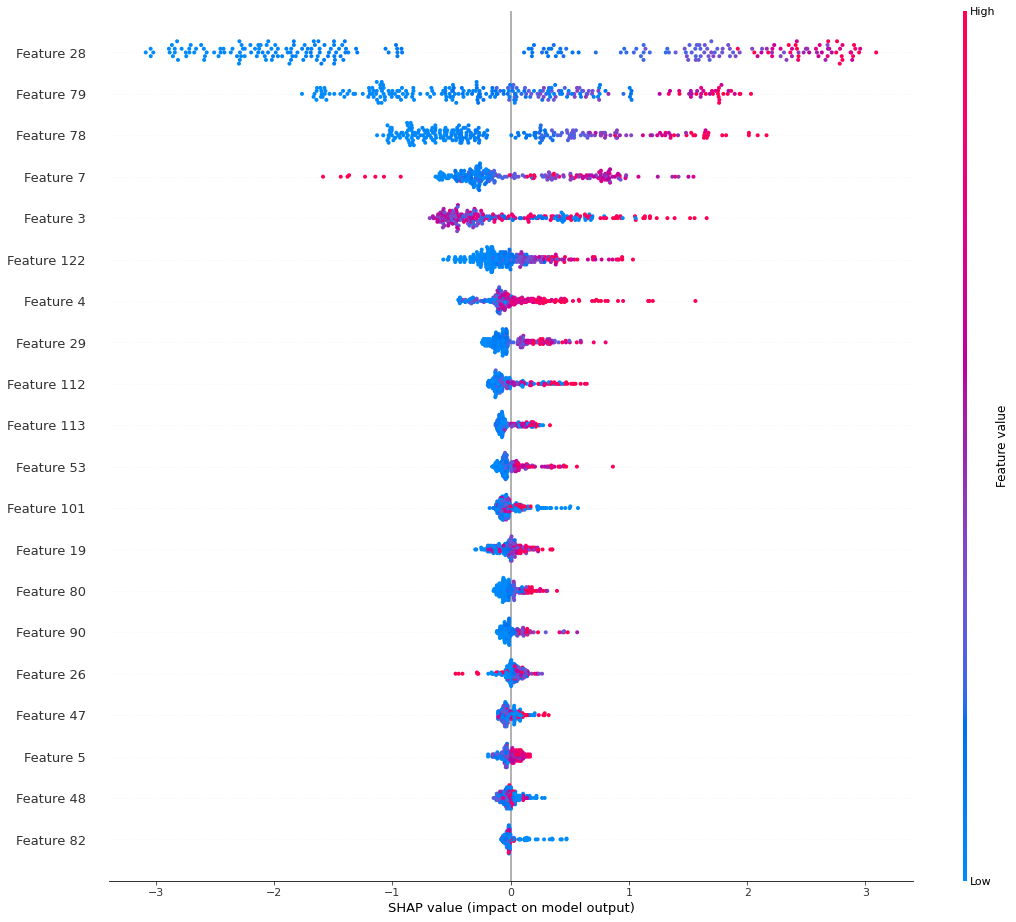

In [28]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(LGBMRegressor_best.model_)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test_5_poly_4)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_test_5_poly_4, plot_size=(18,16))

### Значимость входных 10 признаков

Анализ значимости начальных 10 признаков можно оценить с помощью фиттинга нелинейной модели и проведения анализа значимости каждого признака.

In [29]:
model = LGBMRegressor()
print(X_train.shape)
print(X_test.shape)

model.fit(X_train, y_train)

r = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=0)

for i in r.importances_mean.argsort()[::-1]:     
    print(f"{i:<12}"
          f"{r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")

(750, 10)
(250, 10)
3           0.625 +/- 0.039
0           0.527 +/- 0.044
1           0.440 +/- 0.038
2           0.160 +/- 0.013
4           0.124 +/- 0.011
5           0.001 +/- 0.001
8           0.001 +/- 0.000
7           0.000 +/- 0.000
6           0.000 +/- 0.000
9           -0.000 +/- 0.000


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


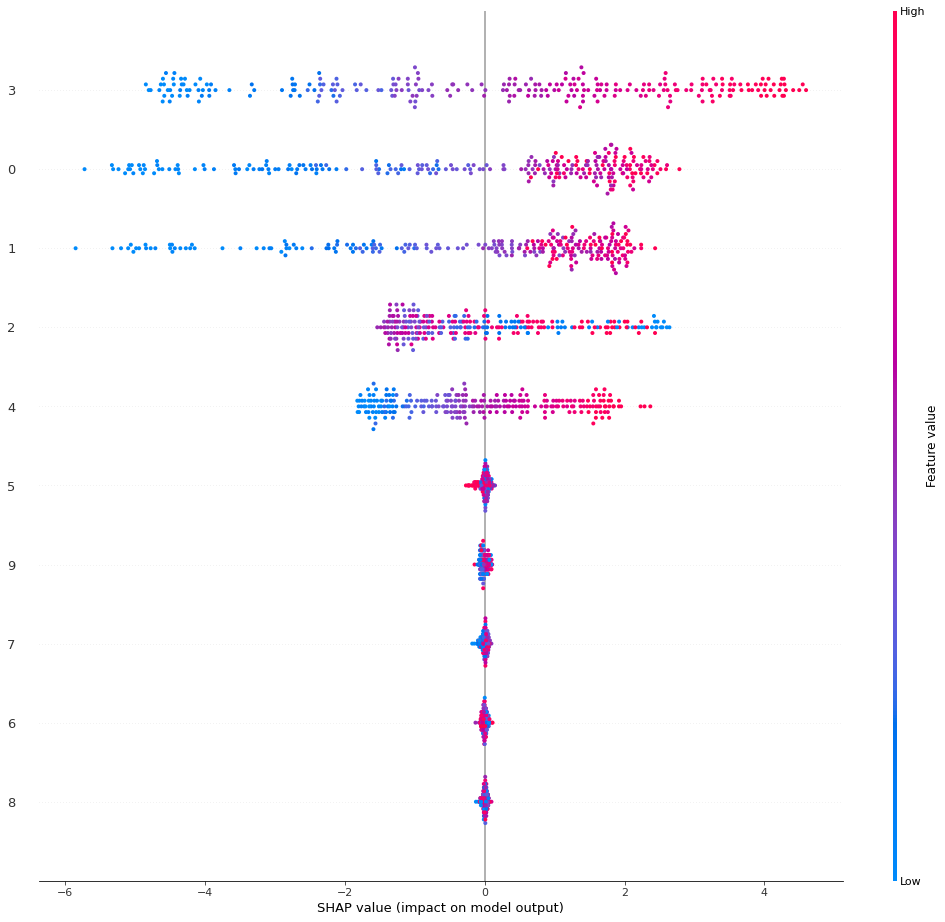

In [30]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_test, plot_size=(18,16))

Из полученных данных можно сделать вывод, что из начальных 10 входных переменных наибольшую значимость имеют первые три переменные, среднюю значимость имеют четвёртая и пятая переменные, и фактически незначимыми являются остальные 5 переменных.

### Что еще можно предложить чтобы улучшить получившийся результат?

*Наилучший результат получен для линейной регрессии после отбрасывания последних 5 входных переменных и введения полиномиальных переменных 4-й степени. Метрика R2 на тестовых данных получилась равной **0.9947296494707031**, а точность **0.856**. Это высокие показатели.*

**Для сравнения, максимальные метрики для градиентного бустинга R2 score 0.9544645535698529, accuracy 0.512*

*Можно было бы попробовать улучшить метрики на градиентном бустинге, перебрав большее количество гиперпараметров с помощью поиска по сетке или случайного поиска. Но, если честно, я сомневаюсь, что градиентный бустинг сможет показать лучшие результаты.*

*Также можно было бы попробовать добавить новые признаки, например разделить первые три признака на два интервала и ввести три дополнительных признака, обозначающих половину, к которой относится точка. Например, для признака с индеком 2 можно ввести новый бинарный признак, равный 1, если признак больше 0.5 и 0, если признак меньше 0.5.*